# Forecast Evaluations

In [1]:
import pandas as pd
from fbprophet import Prophet
%matplotlib inline

In [2]:
df = pd.read_csv('Miles_Traveled.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              588 non-null    object 
 1   TRFVOLUSM227NFWA  588 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


In [4]:
df.head()

,DATE,TRFVOLUSM227NFWA
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [5]:
df.columns = ['ds','y']

In [6]:
# date time format
df['ds'] = pd.to_datetime(df['ds'])

In [7]:
df.head()

,ds,y
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


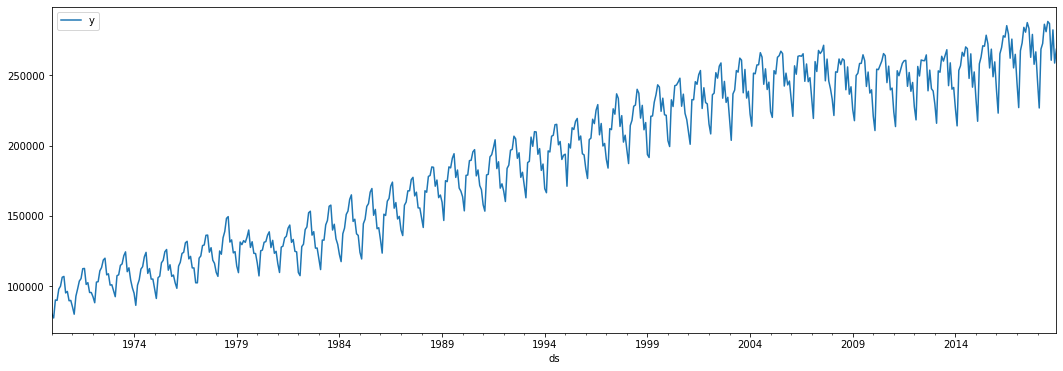

In [8]:
df.plot(x='ds',y='y',figsize=(18,6))

In [9]:
len(df)

588

In [10]:
len(df) - 12

576

In [11]:
train = df.iloc[:576]
test = df.iloc[576:]

In [12]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=12,freq='MS')
forecast = m.predict(future)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [194]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
583,2018-08-01,263348.877048,274069.034629,285530.763538,263272.182929,263408.698329,16448.763644,16448.763644,16448.763644,16448.763644,16448.763644,16448.763644,0.0,0.0,0.0,279797.640692
584,2018-09-01,263489.606772,255853.724067,267198.537533,263369.019000,263577.835001,-1669.492450,-1669.492450,-1669.492450,-1669.492450,-1669.492450,-1669.492450,0.0,0.0,0.0,261820.114321
585,2018-10-01,263625.796827,263247.354895,274539.143701,263477.532695,263745.882773,5307.799177,5307.799177,5307.799177,5307.799177,5307.799177,5307.799177,0.0,0.0,0.0,268933.596004
586,2018-11-01,263766.526551,250087.267929,261329.148126,263586.328108,263936.075269,-8206.692440,-8206.692440,-8206.692440,-8206.692440,-8206.692440,-8206.692440,0.0,0.0,0.0,255559.834111
587,2018-12-01,263902.716607,251026.012016,262766.066957,263680.350517,264106.895858,-6920.633214,-6920.633214,-6920.633214,-6920.633214,-6920.633214,-6920.633214,0.0,0.0,0.0,256982.083393


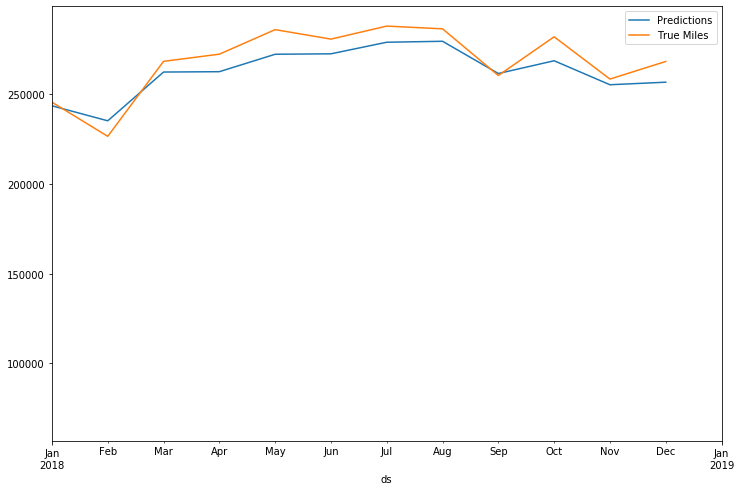

In [14]:
ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))

test.plot(x='ds',y='y',label='True Miles',legend=True,ax=ax,xlim=('2018-01-01','2019-01-01'))

In [15]:
from statsmodels.tools.eval_measures import rmse

In [16]:
predictions = forecast.iloc[-12:]['yhat']

In [17]:
predictions

576    243683.663737
577    235311.776917
578    262511.200772
579    262708.863987
580    272429.495856
581    272679.913346
582    279136.474721
583    279670.503702
584    261691.120472
585    268802.080112
586    255426.342492
587    256847.091078
Name: yhat, dtype: float64

In [18]:
test['y']

576    245695.0
577    226660.0
578    268480.0
579    272475.0
580    286164.0
581    280877.0
582    288145.0
583    286608.0
584    260595.0
585    282174.0
586    258590.0
587    268413.0
Name: y, dtype: float64

In [19]:
rmse(predictions,test['y'])

8750.25052083061

In [20]:
test.mean()

y    268739.666667
dtype: float64